<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [21]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [3]:
def download(url, filename):
    response = requests.get(url)
    if response.ok:
        with open(filename, "wb") as f:
            f.write(response.content)

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [9]:
download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [10]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [19]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Users\kamra\AppData\Local\Temp\ipykernel_10364\1282253818.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ConvertedComp'], shade=True)


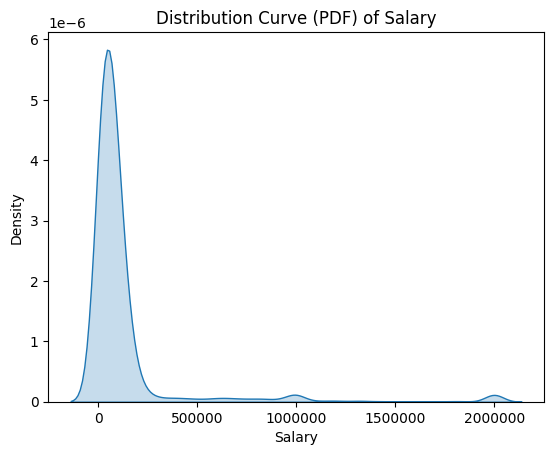

In [31]:
sns.kdeplot(df['ConvertedComp'], shade=True)
plt.title('Distribution Curve (PDF) of Salary')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.ticklabel_format(style='plain', axis='x')

Plot the histogram for the column `ConvertedComp`.


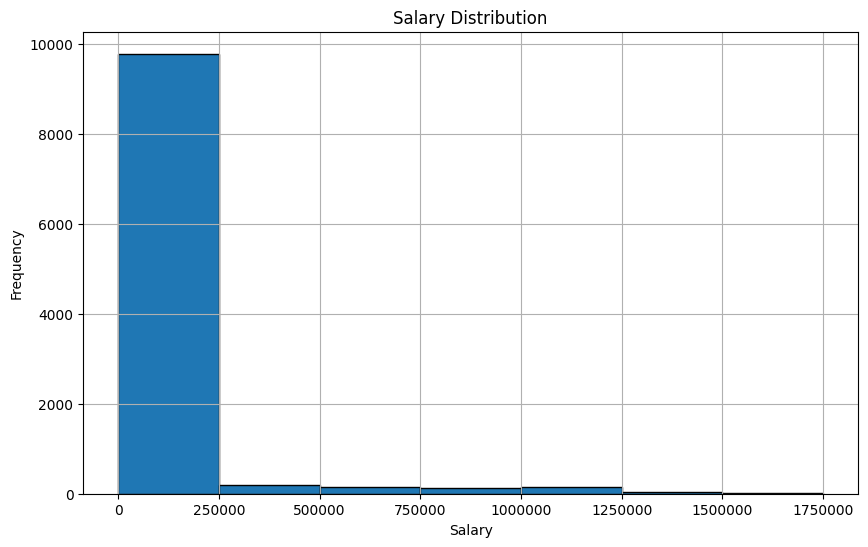

In [29]:
# your code goes here
bin_edges = np.arange(0, 2000000, 250000)
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=bin_edges, edgecolor='black')  # Adjust number of bins as needed
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)

# Adjust x-axis tick format to avoid scientific notation
plt.ticklabel_format(style='plain', axis='x')

plt.show()

What is the median of the column `ConvertedComp`?


In [32]:
# your code goes here
median = df['ConvertedComp'].median()
median

57745.0

How many responders identified themselves only as a **Man**?


In [35]:
# your code goes here
df[df['Gender'] == 'Man'].shape[0]

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [36]:
# your code goes here
only_women_comp_median = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
only_women_comp_median

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [40]:
# your code goes here
age = df['Age'].to_frame()
age.describe()

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


Plot a histogram of the column `Age`.


Text(0, 0.5, 'Frequency')

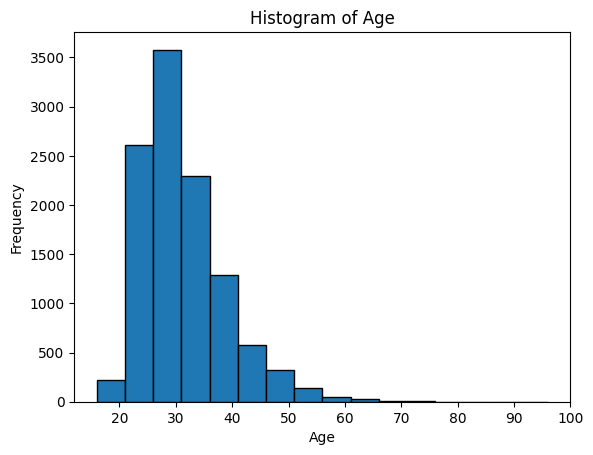

In [51]:
# your code goes here
age_bins = np.arange(df['Age'].min(), df['Age'].max(), 5)
plt.hist(df['Age'], bins=age_bins, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


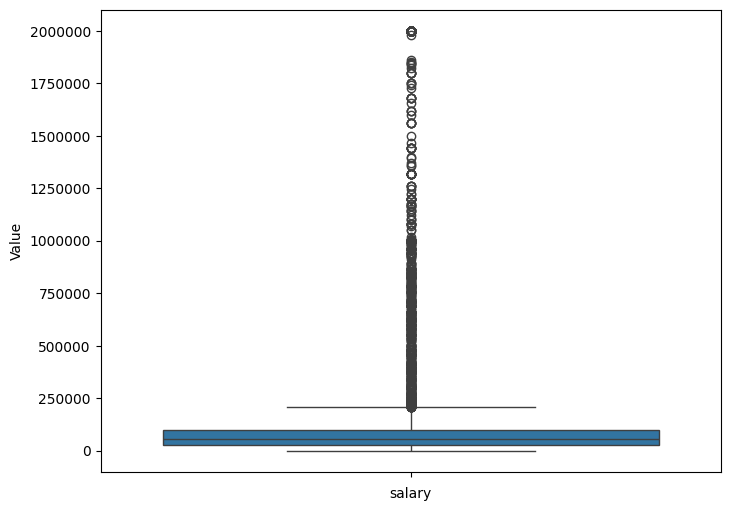

In [54]:
# your code goes here
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ConvertedComp'])
plt.title('')
plt.xlabel('salary')
plt.ylabel('Value')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [87]:
# your code goes here
CC = df['ConvertedComp'].to_frame().describe()
lower_quartile = CC.loc['25%', 'ConvertedComp']
upper_quartile = CC.loc['75%','ConvertedComp']
IQR = upper_quartile - lower_quartile
print(f'lower_quartile {lower_quartile}, upper_quartile {upper_quartile}, IQR {IQR}')

lower_quartile 26868.0, upper_quartile 100000.0, IQR 73132.0


Find out the upper and lower bounds.


In [88]:
# your code goes here
upper_bound = upper_quartile + 1.5*IQR 
lower_bound = lower_quartile - 1.5*IQR
print('upper',upper_bound, "   " ,'lower', lower_bound)

upper 209698.0     lower -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [92]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
outliers
num_of_outliers = outliers.shape[0]
num_of_outliers

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [108]:
# your code goes here
df_new = df[df['ConvertedComp'] < upper_bound ]
df_new.shape
res = df_new['ConvertedComp'].mean()
res

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [104]:
# your code goes here
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
numerical_columns.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
